In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
Data = pd.read_csv('dataset\Anime.csv')
animeData = Data.copy()
animeData.head(n = 10)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,aired_from,aired_to,genre,studio,synopsis
0,52991,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,TV,28.0,9.30,1.0,142,1119371,Finished Airing,Manga,24 min per ep,2023-09-29T00:00:00+00:00,2024-03-22T00:00:00+00:00,"Adventure, Drama, Fantasy",Madhouse,During their decade-long quest to defeat the D...
1,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,9.10,2.0,3,3522284,Finished Airing,Manga,24 min per ep,2009-04-05T00:00:00+00:00,2010-07-04T00:00:00+00:00,"Action, Adventure, Drama, Fantasy",Bones,After a horrific alchemy experiment goes wrong...
2,9253,Steins;Gate,Steins;Gate,STEINS;GATE,TV,24.0,9.07,3.0,14,2697581,Finished Airing,Visual novel,24 min per ep,2011-04-06T00:00:00+00:00,2011-09-14T00:00:00+00:00,"Drama, Sci-Fi, Suspense",White Fox,Eccentric scientist Rintarou Okabe has a never...
3,38524,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10.0,9.05,4.0,21,2445236,Finished Airing,Manga,23 min per ep,2019-04-29T00:00:00+00:00,2019-07-01T00:00:00+00:00,"Action, Drama, Suspense",Wit Studio,Seeking to restore humanity's diminishing hope...
4,28977,Gintama°,Gintama Season 4,銀魂°,TV,51.0,9.05,5.0,343,667240,Finished Airing,Manga,24 min per ep,2015-04-08T00:00:00+00:00,2016-03-30T00:00:00+00:00,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,"Gintoki, Shinpachi, and Kagura return as the f..."
5,60022,One Piece Fan Letter,NaN,ONE PIECE FAN LETTER,TV Special,1.0,9.04,7.0,2115,110262,Finished Airing,Light novel,24 min,2024-10-20T00:00:00+00:00,NaN,"Action, Adventure, Fantasy",Toei Animation,Although the golden age of piracy is about to ...
6,39486,Gintama: The Final,Gintama: The Very Final,銀魂 THE FINAL,Movie,1.0,9.04,6.0,1521,169676,Finished Airing,Manga,1 hr 44 min,2021-01-08T00:00:00+00:00,NaN,"Action, Comedy, Drama, Sci-Fi",Bandai Namco Pictures,Two years have passed following the Tendoshuu'...
7,11061,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148.0,9.03,8.0,8,3022721,Finished Airing,Manga,23 min per ep,2011-10-02T00:00:00+00:00,2014-09-24T00:00:00+00:00,"Action, Adventure, Fantasy",Madhouse,Hunters devote themselves to accomplishing haz...
8,9969,Gintama',Gintama Season 2,銀魂',TV,51.0,9.02,9.0,402,589724,Finished Airing,Manga,24 min per ep,2011-04-04T00:00:00+00:00,2012-03-26T00:00:00+00:00,"Action, Comedy, Sci-Fi",Sunrise,"After a one-year hiatus, Shinpachi Shimura ret..."
9,15417,Gintama': Enchousen,Gintama: Enchousen,銀魂' 延長戦,TV,13.0,9.02,10.0,751,345232,Finished Airing,Manga,24 min per ep,2012-10-04T00:00:00+00:00,2013-03-28T00:00:00+00:00,"Action, Comedy, Sci-Fi",Sunrise,"While Gintoki Sakata was away, the Yorozuya fo..."


In [3]:
print('Number of unique elements in each attribute:\n')

# Get number of unique values per column
for column in animeData.columns:
    unique_count = animeData[column].nunique()
    print(f"{column}: {unique_count} unique values")

print("\n" + "="*60 + "\n")


Number of unique elements in each attribute:

anime_id: 28467 unique values
name: 28460 unique values
title_english: 12001 unique values
title_japanese: 27260 unique values
type: 9 unique values
episodes: 258 unique values
rating: 569 unique values
rank: 17352 unique values
popularity: 22712 unique values
members: 12038 unique values
status: 3 unique values
source: 17 unique values
duration: 341 unique values
aired_from: 9234 unique values
aired_to: 5507 unique values
genre: 927 unique values
studio: 1850 unique values
synopsis: 23122 unique values




In [4]:
genre_counts = (
    animeData
    .dropna(subset=['genre'])
    .assign(genre=animeData['genre'].str.split(','))
    .explode('genre')
    .assign(genre=lambda df: df['genre'].str.strip())
    .groupby('genre')
    .size()
    .sort_values(ascending=False)
)

print("Anime count per genre:")
print(genre_counts)


Anime count per genre:
genre
Comedy           7688
Fantasy          5881
Action           5521
Adventure        4335
Sci-Fi           3425
Drama            3051
Romance          2162
Hentai           1564
Slice of Life    1556
Supernatural     1535
Avant Garde      1042
Mystery           983
Ecchi             819
Sports            808
Horror            577
Suspense          449
Award Winning     259
Gourmet           225
Boys Love         191
Girls Love        118
Erotica            78
dtype: int64


In [5]:
# List of genres to drop (e.g., adult content)
genres_to_drop = {'Hentai', 'Erotica'}

def contains_drop_genre(genre_str):
    if pd.isna(genre_str):
        return False
    return any(g.strip() in genres_to_drop for g in genre_str.split(','))

mask = animeData['genre'].apply(contains_drop_genre)
print(f"Number of animes to drop: {mask.sum()}")

animeData = animeData[~mask].reset_index(drop=True)


Number of animes to drop: 1642


In [6]:
animeData.isnull().sum()

anime_id              0
name                  0
title_english     15223
title_japanese      152
type                 67
episodes            555
rating            10030
rank               4951
popularity            0
members               0
status                0
source                0
duration              0
aired_from          841
aired_to          16894
genre              5918
studio            11524
synopsis           4833
dtype: int64

rank is based on the rating?right? so we can just assign some rating based on the ranking. \

see how popularity and ranking vary. since popularity has no null vals, maybe a relationship couls help us impute a  lot of other values.

we can probably just drop the english title, its mostly the same as the name afaik (verify this too)

aired_to nulls could mean its still airing? or indefinetely stopped with no updates from the author?

we are building model based on this dataset. we are not putting in efforts to make this dataset the best (atleast for now)

an empty synopsis could mean a less popular anime? empty studio?? maybe lets just drop it. genre is fine we might have to impute them with unknown tho. 

the goal is to try and keep most od the 28k anime in the final cleaned dataset.

In [7]:
pd.set_option('display.max_rows', 500)   # or None for unlimited
pd.set_option('display.max_colwidth', None)  # prevent column truncation


In [8]:
def print_top_unique_values(df, columns, top_n=10):
    for col in columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False).head(top_n))

columns_to_check = animeData.columns.tolist()

print_top_unique_values(animeData, columns_to_check, top_n=150)




--- anime_id ---
anime_id
13781    1
52991    1
5114     1
9253     1
38524    1
28977    1
60022    1
39486    1
11061    1
9455     1
9498     1
9518     1
9533     1
9536     1
9540     1
9546     1
9562     1
9606     1
23779    1
9749     1
9797     1
9807     1
9811     1
9812     1
9819     1
199      1
37521    1
32935    1
263      1
40028    1
31758    1
37510    1
55255    1
36838    1
49387    1
59571    1
32281    1
40682    1
37987    1
58514    1
35247    1
24701    1
39894    1
53223    1
55016    1
21       1
50160    1
45649    1
2921     1
52198    1
1        1
51009    1
47917    1
55690    1
58567    1
48583    1
17074    1
5258     1
56784    1
57864    1
40434    1
245      1
33352    1
21939    1
44       1
1575     1
33095    1
53998    1
50172    1
52215    1
47778    1
48569    1
44074    1
40591    1
54898    1
35760    1
45576    1
11665    1
34599    1
23273    1
46102    1
2001     1
50399    1
457      1
49413    1
33050    1
58125    1
164      1
431  

for synopsis,
NaN                                                                                                                                           
No synopsis has been added for this series yet.\n\nClick here to update this information....

same name -  diff anime_id,there are 7 animes with 2 columns with same name

Members has 0 vals, but ig thats possible?
rank and popularity 0 ?? and animes with same rank? how do rank and popularity have duplicate values? shouldnt they be unique? or do diff animes have same ranks?
the same datapoints might have rank, popularity and members as 0, total 225

aired_from and aired_to, might not have full inof about which day and month so they couldve been assigned the reigth year but 1st of Jan

duration and source have 'Unknown'.


episodes have 1 value points, a little sus, but ig many movies and OVAs could just have 1 episode




In [9]:
print("Popularity == 0:", (animeData['popularity'] == 0).sum())
print("Members == 0:", (animeData['members'] == 0).sum())
print("Rank == 0:", (animeData['rank'] == 0).sum())


triple_zero = animeData[
    (animeData['popularity'] == 0) &
    (animeData['members'] == 0) &
    (animeData['rank'] == 0)
]
print("All three == 0:", len(triple_zero))


Popularity == 0: 224
Members == 0: 225
Rank == 0: 224
All three == 0: 224


In [10]:
# triple_zero.head(n=225)
animeData = animeData[
    ~(
        (animeData['popularity'] == 0) &
        (animeData['members'] == 0) &
        (animeData['rank'] == 0)
    )
].reset_index(drop=True)


Stopping here

re-run the notebook from start
u dropped some useless anime-225. u wanna recheck nulls and then go on to impute.

u might impute strings to unknown, for now? 
once eda is done upload it to kaggle

also replace the placeholders.

In [11]:
from dateutil import parser

def extract_year(date_str):
    if pd.isna(date_str):
        return np.nan
    try:
        return parser.parse(date_str).year
    except:
        return np.nan

animeData['aired_from_year'] = animeData['aired_from'].apply(extract_year)
animeData['aired_to_year'] = animeData['aired_to'].apply(extract_year)

# Optionally, drop original columns
animeData.drop(columns=['aired_from', 'aired_to'], inplace=True)

In [12]:
placeholder_mask = animeData['synopsis'].str.startswith("No synopsis has been added for this series yet", na=False)
print("Total rows with placeholder:", placeholder_mask.sum())

placeholders = animeData.loc[placeholder_mask, 'synopsis'].unique()

for i, val in enumerate(placeholders):
    print(f"[{i}] Length: {len(val)}\n{val}\n{'='*80}")



Total rows with placeholder: 22
[0] Length: 90
No synopsis has been added for this series yet.

Click here to update this information....
[1] Length: 91
No synopsis has been added for this series yet. 

Click here to update this information....
[2] Length: 50
No synopsis has been added for this series yet....


In [13]:
animeData['synopsis'] = animeData['synopsis'].apply(
    lambda x: np.nan if isinstance(x, str) and x.startswith("No synopsis has been added for this series yet") else x
)

In [14]:
animeData.isna().sum()

anime_id               0
name                   0
title_english      15066
title_japanese       113
type                  62
episodes             540
rating              9806
rank                4951
popularity             0
members                0
status                 0
source                 0
duration               0
genre               5820
studio             11305
synopsis            4814
aired_from_year      834
aired_to_year      16686
dtype: int64

anime_id              0
name                  0
type                 67
episodes            612
rating            10046
rank               6592
popularity            0
members               0
status                0
source                0
duration              0
aired_from          843
genre              5918
studio            11673
synopsis           5051
dtype: int64
drop english and japanese titles, aired_to -  no use
type, nulls? - impute with unknown


In [15]:
columns_to_check = animeData.columns.tolist()
print_top_unique_values(animeData, columns_to_check, top_n=150)



--- anime_id ---
anime_id
13781    1
52991    1
5114     1
9253     1
38524    1
28977    1
60022    1
39486    1
11061    1
9455     1
9498     1
9518     1
9533     1
9536     1
9540     1
9546     1
9562     1
9606     1
23779    1
9749     1
9797     1
9807     1
9811     1
9812     1
9819     1
199      1
37521    1
32935    1
263      1
40028    1
31758    1
37510    1
55255    1
36838    1
49387    1
59571    1
32281    1
40682    1
37987    1
58514    1
35247    1
24701    1
39894    1
53223    1
55016    1
21       1
50160    1
45649    1
2921     1
52198    1
1        1
51009    1
47917    1
55690    1
58567    1
48583    1
17074    1
5258     1
56784    1
57864    1
40434    1
245      1
33352    1
21939    1
44       1
1575     1
33095    1
53998    1
50172    1
52215    1
47778    1
48569    1
44074    1
40591    1
54898    1
35760    1
45576    1
11665    1
34599    1
23273    1
46102    1
2001     1
50399    1
457      1
49413    1
33050    1
58125    1
164      1
431  

In [16]:
rating_rank = animeData[(animeData['rating'].isna()) & (animeData['rank'].isna())]
print("Rows with NaN rating and rank:", len(rating_rank))
rating_rank.head(n=10)

Rows with NaN rating and rank: 2172


,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year
16792,61731,Gakkou de wa Oshiete Kurenai Taisetsu na Koto,NaN,学校では教えてくれない大切なこと,TV,NaN,NaN,NaN,28421,0,Not yet aired,Book,Unknown,Comedy,Imagica Infos,"Unique and reliable ""experts"" appear before elementary school students who are struggling with issues such as ""I'm not good at tidying up,"" ""I keep putting off my homework because I'm so obsessed with games,"" and ""My grades aren't improving as much as I'd like,"" and provide passionate instruction to teach them important things that they should learn but that they won't learn at school.\n\n(Source: MANTANWEB, translated)...",2025.0,NaN
16794,61440,Watashi no Shiawase na Kekkon (Shinsaku Anime),NaN,わたしの幸せな結婚 新作アニメ,NaN,NaN,NaN,NaN,6276,12349,Not yet aired,Novel,Unknown,"Drama, Fantasy, Romance",NaN,New anime project of Watashi no Shiawase na Kekkon....,NaN,NaN
16795,61349,"PlayStation x YOASOBI ""Players"" 30-shuunen Tokubetsu CM","PlayStation x YOASOBI ""Players"" 30th Anniversary Special CM",PlayStation® × YOASOBI「PLAYERS」30周年特別CM,CM,1.0,NaN,NaN,23131,150,Finished Airing,Original,2 min,"Action, Sci-Fi",NaN,"The 30th anniversary special video using the original song Player by YOASOBI, born from the 30th anniversary project Project: Memory Card for the release of the original PlayStation.\n\n(Source: Youtube, translated)...",2025.0,NaN
16797,61435,Kaiten Mokuba,NaN,回転木馬,Music,1.0,NaN,NaN,28258,54,Finished Airing,Original,4 min,NaN,NaN,Music video for the song Kaiten Mokuba by Tamurapan....,2007.0,NaN
16798,61375,A Day In Autumn,NaN,A DAY IN AUTUMN,Music,1.0,NaN,NaN,28061,65,Finished Airing,Original,7 min,NaN,Gainax,Music video for the song A Day In Autumn by Tomosayu Hotei....,1989.0,NaN
16799,61374,Dancing with the Moonlight,NaN,DANCING WITH THE MOONLIGHT,Music,1.0,NaN,NaN,28259,54,Finished Airing,Original,5 min,NaN,Gainax,Music video for the song Dancing with the Moonlight by Tomoyasu Hotei....,1989.0,NaN
16800,61425,Ponkotsu Fuuki Iin to Skirt-take ga Futekisetsu na JK no Hanashi,NaN,ポンコツ風紀委員とスカート丈が不適切なJKの話,TV,NaN,NaN,NaN,13701,1234,Not yet aired,Manga,Unknown,"Comedy, Romance",Zero-G,"Sakuradaimon takes his role on the school's Public Morals Committee very seriously. Every day, he dutifully checks students' appearances at the school gate—most often scolding Kohinata, a rule-breaking girl with bright hair and a short skirt.\n\nThough she finds his constant lecturing annoying, everything changes when she discovers that Sakuradaimon is actually a bit of a mess himself.\n\nA lighthearted short romantic comedy about a strict committee member, a bold classmate, and the chaotic school l...",NaN,NaN
16802,61419,Obeka,NaN,おべか,Music,1.0,NaN,NaN,28184,58,Finished Airing,Original,3 min,NaN,NaN,Music video for the song Obeka by Surii featuring Kasane Teto and Kagamine Len....,2024.0,NaN
16803,61418,Kusunoki no Bannin,The Keeper of the Camphor Tree,クスノキの番人,Movie,1.0,NaN,NaN,15740,711,Not yet aired,Novel,Unknown,NaN,A-1 Pictures,"If you knew you didn't have long to live, who would you tell? What would you say? And how would you deliver the message?\n\nThe Keeper of the Camphor Tree starts with Reito Naoi, a man in his early 20s, being unjustly fired from his job. Enraged and fueled by feelings of revenge, he tries to steal a valuable device from his workplace, but things don't go to plan, and he ends up arrested.\n\nIn jail, Reito is paid an unexpected visit by a lawyer who offers to arrange for his release, if he complies w...",2026.0,NaN
16804,61416,Wo Jide,Teen on Shuqian Street,我记得,Music,1.0,NaN,NaN,28281,52,Finished Airing,Original,5 min,NaN,NaN,Music video for the song Wo Jide by Zhao Lei....,2022.0,NaN


In [17]:
import re


def parse_duration(duration_str):
    if not isinstance(duration_str, str):
        return np.nan

    duration_str = duration_str.lower().strip()
    
    if "unknown" in duration_str or duration_str == "":
        return np.nan

    # Regex patterns
    hr = re.search(r'(\d+)\s*hr', duration_str)
    mins = re.findall(r'(\d+)\s*min', duration_str)
    secs = re.search(r'(\d+)\s*sec', duration_str)

    total_minutes = 0

    if hr:
        total_minutes += int(hr.group(1)) * 60

    if mins:
        total_minutes += int(mins[-1])  # Use last minute match

    if secs:
        total_minutes += int(secs.group(1)) / 60  # Add fractional mins

    return round(total_minutes, 2) if total_minutes > 0 else np.nan


animeData['duration_mins'] = animeData['duration'].apply(parse_duration)


In [18]:
print(animeData[['duration', 'duration_mins']].head(15))


         duration  duration_mins
0   24 min per ep           24.0
1   24 min per ep           24.0
2   24 min per ep           24.0
3   23 min per ep           23.0
4   24 min per ep           24.0
5          24 min           24.0
6     1 hr 44 min          104.0
7   23 min per ep           23.0
8   24 min per ep           24.0
9   24 min per ep           24.0
10  26 min per ep           26.0
11  24 min per ep           24.0
12  24 min per ep           24.0
13  23 min per ep           23.0
14  23 min per ep           23.0


In [19]:
len(animeData['duration_mins'].unique())


208

In [20]:
duration_mapping = (
    animeData
    .dropna(subset=['duration'])  # ignore missing durations
    .drop_duplicates(subset=['duration'])[['duration', 'duration_mins']]
    .sort_values(by='duration_mins', na_position='last')
)

print(duration_mapping.to_string(index=False))


          duration  duration_mins
             3 sec           0.05
      6 sec per ep           0.10
      7 sec per ep           0.12
             7 sec           0.12
     10 sec per ep           0.17
            10 sec           0.17
     12 sec per ep           0.20
            12 sec           0.20
            13 sec           0.22
            14 sec           0.23
     14 sec per ep           0.23
            15 sec           0.25
     15 sec per ep           0.25
     16 sec per ep           0.27
            16 sec           0.27
            17 sec           0.28
     18 sec per ep           0.30
            18 sec           0.30
            19 sec           0.32
     19 sec per ep           0.32
     20 sec per ep           0.33
            20 sec           0.33
            21 sec           0.35
     21 sec per ep           0.35
     22 sec per ep           0.37
            22 sec           0.37
     23 sec per ep           0.38
            23 sec           0.38
     24 sec pe

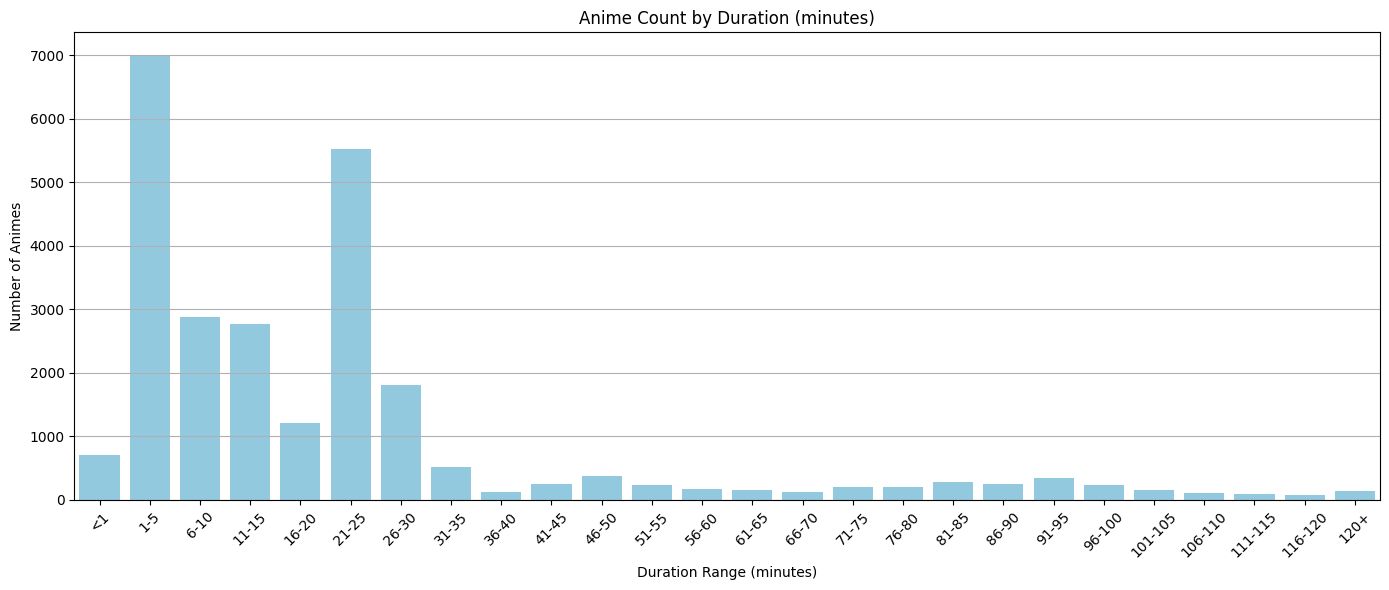

In [21]:
bin_edges = [0, 1] + list(range(5, 125, 5)) + [float('inf')]
# There are 26 bins, so we need 26 labels
bin_labels = ['<1'] + [f"{i}-{i+4}" for i in range(1, 121, 5)] + ['120+']

animeData['duration_bucket'] = pd.cut(animeData['duration_mins'], 
                                       bins=bin_edges,
                                       labels=bin_labels,
                                       right=False)

plt.figure(figsize=(14, 6))
sns.countplot(data=animeData, x='duration_bucket', order=bin_labels, color='skyblue')
plt.title("Anime Count by Duration (minutes)")
plt.xlabel("Duration Range (minutes)")
plt.ylabel("Number of Animes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [22]:
# Duration-based subsets
less_than_1_min = animeData[animeData['duration_mins'] < 1]
between_1_and_5_min = animeData[(animeData['duration_mins'] >= 1) & (animeData['duration_mins'] <= 5)]
between_6_and_10_min = animeData[(animeData['duration_mins'] >= 6) & (animeData['duration_mins'] <= 10)]
between_11_and_15_min = animeData[(animeData['duration_mins'] >= 11) & (animeData['duration_mins'] <= 15)]
# Print type distributions
print("--- Types for Duration < 1 min ---")
print(less_than_1_min['type'].value_counts())

print("\n--- Types for Duration 1–5 min ---")
print(between_1_and_5_min['type'].value_counts())

print("\n--- Types for Duration 6–10 min ---")
print(between_6_and_10_min['type'].value_counts())

print("\n--- Types for Duration 11–15 min ---")
print(between_11_and_15_min['type'].value_counts())


--- Types for Duration < 1 min ---
type
CM            288
ONA           197
PV             69
Special        68
TV             45
Movie          23
Music          10
TV Special      3
OVA             1
Name: count, dtype: int64

--- Types for Duration 1–5 min ---
type
Music         3585
ONA           1687
TV            1050
Special        707
Movie          691
PV             165
CM             154
TV Special     114
OVA            111
Name: count, dtype: int64

--- Types for Duration 6–10 min ---
type
ONA           626
TV            617
Movie         535
Special       200
OVA           133
Music          98
TV Special     19
PV             10
CM              8
Name: count, dtype: int64

--- Types for Duration 11–15 min ---
type
TV            1470
ONA            415
OVA            304
Movie          261
Special        161
TV Special      20
Music            6
CM               2
PV               2
Name: count, dtype: int64


In [23]:
between_1_and_5_min[(between_1_and_5_min['type'] == 'Movie')].head(n=10) 

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
1780,41590,Re:Zero kara Hajimeru Isekai Seikatsu - Hyouketsu no Kizuna - Manner Movie,Re:ZERO -Starting Life in Another World- The Frozen Bond: Manner Movie,Re:ゼロから始める異世界生活 氷結の絆 マナームービー,Movie,1.0,7.56,1749.0,3421,48900,Finished Airing,Light novel,3 min,Fantasy,Studio PuYUKAI,A manner movie shown before Re:Zero kara Hajimeru Isekai Seikatsu - Hyouketsu no Kizuna....,2019.0,NaN,3.0,1-5
1955,39921,Re:Zero kara Hajimeru Isekai Seikatsu - Memory Snow - Manner Movie,Re:ZERO -Starting Life in Another World- Memory Snow: Manner Movie,Re:ゼロから始める異世界生活 Memory Snow マナームービー,Movie,1.0,7.52,1931.0,3197,55164,Finished Airing,Light novel,3 min,Fantasy,Studio PuYUKAI,"Subaru Natsuki finally gets to take a breather, but he does not waste any time as he prepares for a date with his beloved Emilia. He scouts the nearby village for the right dating spot, and with the help of the village children, he finds a wonderful location. With that, he is well prepared for his date! Unfortunately for Subaru, cold weather suddenly sweeps across Roswaal's mansion on his important day, leaving him with no choice but to postpone the date. Overnight, it becomes even colder and un...",2018.0,NaN,3.0,1-5
3826,32153,Mahou Shoujo Madoka★Magica: Concept Movie,Puella Magi Madoka Magica Concept Movie,魔法少女まどか★マギカ コンセプトムービー,Movie,1.0,7.15,3668.0,4349,30538,Finished Airing,Original,4 min,"Drama, Suspense",Shaft,"Contemplating the meaning of happiness, Madoka Kaname and Homura Akemi compose possible answers that lead them to reflect on their own choices. Meanwhile, strange occurrences cause turmoil among the magical girls as they navigate the challenges of their destiny.\n\n[Written by MAL Rewrite]...",2015.0,NaN,4.0,1-5
4225,2386,One Piece: Yume no Soccer Ou!,One Piece: Dream Soccer King,ワンピース 夢のサッカー王!,Movie,1.0,7.08,4084.0,3446,48159,Finished Airing,Manga,5 min,"Comedy, Fantasy, Sports",Toei Animation,Luffy and his crew take on the Villain All-Stars in a game of soccer in order to become the Dream Soccer King. The game comes down to a pk tie-breaker shoot-out with Coby as goalie and Helmeppo refereeing.\n\n(Source: ANN)...,2002.0,NaN,5.0,6-10
4863,40298,Youjo Senki Movie: Manner Eizou,Saga of Tanya the Evil: The Movie - Manner Movie,劇場版 幼女戦記 マナー映像,Movie,1.0,6.95,4649.0,4950,22835,Finished Airing,Light novel,2 min,Comedy,Studio PuYUKAI,"A manner movie aired before the Youjo Senki Movie. Done in the chibi art style of Youjo Shenki and Isekai Quartet, Tanya and her battalion tell the viewers to refrain from improper theater etiquette such as using phones during the film, talking, and smoking. The manner movie was later included on the DVD/BD release of the film....",2019.0,NaN,2.0,1-5
4865,2490,One Piece: Mezase! Kaizoku Yakyuu Ou,One Piece: Take Aim! The Pirate Baseball King,ワンピース めざせ！海賊野球王,Movie,1.0,6.95,4670.0,3897,38642,Finished Airing,Manga,5 min,"Comedy, Fantasy, Sports",Toei Animation,Luffy and crew takes on Arlong's crew in baseball. Announced by Bon Clay and Buggy.\n\n(Source: ANN)...,2004.0,NaN,5.0,6-10
5167,37860,Free! Take Your Marks: Character Butai Aisatsu,NaN,特別版 Free!-Take Your Marks- キャラクター舞台挨拶,Movie,4.0,6.89,4940.0,7684,7511,Finished Airing,Original,5 min per ep,Comedy,Kyoto Animation,Character Stage Greeting Manner Special's shown before main movie. Later included on the movie Blu-ray and DVD release....,2017.0,NaN,5.0,6-10
5338,41052,Osomatsu-san Movie: Zensetsu Gekijou,Mr. Osomatsu-san the Movie: Prologue Theater,えいがのおそ松さん 前説劇場,Movie,6.0,6.86,5122.0,11245,2561,Finished Airing,Manga,2 min per ep,Comedy,NaN,Osomatsu-san Movie shorts shown weekly in theaters and later included in DVD/BD release. In them the boys break the fourth wall worrying about their own film being released....,2019.0,2019.0,2.0,1-5
5382,37858,Free! Movie 1: Timeless Medley - Kizuna - Character But

anything less than 5 mins, except music - dropped
music less than 1- dropped

In [24]:
# Create a boolean mask for rows to drop:
# - duration < 5 mins and type is not 'Music'
# - duration < 1 min and type is 'Music'
drop_mask = (
    ((animeData['duration_mins'] < 5) & (animeData['type'] != 'Music')) |
    ((animeData['type'] == 'Music') & (animeData['duration_mins'] < 1))
)

drop_indices = animeData[drop_mask].index
print(f"Number of rows to drop: {len(drop_indices)}")

Number of rows to drop: 4365


In [25]:
animeData = animeData.drop(index=drop_indices).reset_index(drop=True)

In [26]:
animeData.isna().sum()

anime_id               0
name                   0
title_english      12117
title_japanese        77
type                  62
episodes             438
rating              8274
rank                4277
popularity             0
members                0
status                 0
source                 0
duration               0
genre               5215
studio              9243
synopsis            4128
aired_from_year      768
aired_to_year      14223
duration_mins        691
duration_bucket      691
dtype: int64

AIRED FROM, AIRED TO AND EPISODES(HAS TO BE MLTIPLE)

WE CAN FIND AN AVG TIME BW EP

MULTIPLY NO OF EPS AND AVG TIME AND ADD THAT TOO AIRED FROM TO GET AIRED TO

IMPUTE LARGE VALUE FOR NULLS EVEN AFTER THIS -  ONLY IF IT HAS THE STATUS SET TO STILL AIRING

In [27]:
epnull = animeData[animeData['episodes'].isna()]
epnull.head(n=10)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
33,55255,Alien Stage,Alien Stage,ALIEN STAGE (에일리언스테이지),Music,NaN,8.80,NaN,7501,7963,Currently Airing,Music,3 min,"Drama, Sci-Fi, Suspense",LICO,"Humans once lived like Earth was the center of the universe. Some people embraced religion and believed that God would deliver them from suffering. After humanity was enslaved by aliens, no one spoke of God any longer.\n\nNow the grim truth is that humans are mere property of aliens. Recently, entering pet humans into the entertainment industry has become popular, and the biggest, most thrilling spectacle is known as Alien Stage. In this reality singing competition, alien sponsors flaunt their inv...",2022.0,NaN,3.0,1-5
52,21,One Piece,One Piece,ONE PIECE,TV,NaN,8.73,51.0,17,2530348,Currently Airing,Manga,24 min,"Action, Adventure, Fantasy",Toei Animation,"Barely surviving in a barrel after passing through a terrible whirlpool at sea, carefree Monkey D. Luffy ends up aboard a ship under attack by fearsome pirates. Despite being a naive-looking teenager, he is not to be underestimated. Unmatched in battle, Luffy is a pirate himself who resolutely pursues the coveted One Piece treasure and the King of the Pirates title that comes with it.\n\nThe late King of the Pirates, Gol D. Roger, stirred up the world before his death by disclosing the whereabouts...",1999.0,NaN,24.0,21-25
154,60988,Tian Guan Cifu Short Film,Heaven Official's Blessing Short Film,天官賜福 短片,ONA,NaN,8.47,154.0,7834,7175,Currently Airing,Web novel,8 min,"Action, Adventure, Drama, Fantasy",NaN,"A short film celebrating the fourth anniversary of the donghua's releases, highlighting Hua Cheng's and Xie Lian's first encounter....",2025.0,NaN,8.0,6-10
370,47794,MILGЯAM,MILGRAM,ミルグラム,Music,NaN,8.23,NaN,6337,12034,Currently Airing,Other,4 min,Suspense,OTOIRO,"Es awakens in the facility Milgram to find a strange talking animal named Jackalope staring them down. Soon, they learn their purpose: as the prison guard, Es must delve into the psyches of 10 inmates, each of them imprisoned for causing the loss of life in some form or another. Their fates rest in Es' hands. Do the means justify an end, and how much does intent matter if the result is death? No matter how the lines between good and evil, right and wrong, and just and cruel are blurred, there ar...",2020.0,NaN,4.0,1-5
461,235,Meitantei Conan,Case Closed,名探偵コナン,TV,NaN,8.17,441.0,700,365899,Currently Airing,Manga,24 min,"Adventure, Comedy, Mystery",TMS Entertainment,"Shinichi Kudou, a high school student of astounding talent in detective work, is well known for having solved several challenging cases. One day, when Shinichi spots two suspicious men and decides to follow them, he inadvertently becomes witness to a disturbing illegal activity. Unfortunately, he is caught in the act, so the men dose him with an experimental drug formulated by their criminal organization, leaving him to his death. However, to his own astonishment, Shinichi lives to see another d...",1996.0,NaN,24.0,21-25
657,59953,Mushen Ji,Tales of Herding Gods,牧神记,ONA,NaN,8.01,658.0,6059,13516,Currently Airing,Novel,20 min,"Action, Adventure, Fantasy",Sparkly Key Animation Studio,"In the Disabled Elderly Village, there live nine elderly people with unpredictable origins and the young man Qin Mu they raised. One day, the cows that Qin Mu was responsible for grazing began to speak human words. From then on, Qin Mu became more aware of the dangers and beauty of Daxu, a land abandoned by gods: demons descended with darkness, divine bones danced in the ruins, and dragon bones protected their young, a giant ship that drags the sun... No matter what kind of danger he faces, Qin ...",2024.0,NaN,20.0,21-25
1036,966,Crayon Shin-chan,Shin Chan,クレヨンしんちゃん,TV,NaN,7.81,1032.0,2404,90395,Currently Airing,Manga,21 min,"Comedy, Ecchi",Sh

In [28]:
epnull_ = epnull[epnull['status'].isin(['Finished Airing'])]
epnull_.head(n=1)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
5508,50898,Shen Wu Tianzun,The Legend of Sky Lord,神武天尊,ONA,NaN,6.78,5524.0,14630,958,Finished Airing,Manga,10 min,"Action, Fantasy",NaN,"I came from the void. With my hands, I can make the heavens fall and the netherworld crumble. I am a demon, a god, a deity, a human. I am Xiao Chen, the lord of all things.\n\n(Source: IQIYI)...",2020.0,2024.0,10.0,11-15


In [29]:
len(epnull)

438

In [30]:
nosyn = animeData[animeData['synopsis'].isna()]

nosyn.head(10)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
731,58143,Aishang Ta de Liyou Extra,The Girl Downstairs Extra,爱上她的理由,ONA,1.0,7.95,730.0,7686,7498,Finished Airing,Web manga,10 min,Romance,Red Dog Culture House,NaN,2024.0,NaN,10.0,11-15
770,53499,Aikatsu! 10th Story: Mirai e no Starway (2023),NaN,アイカツ！ 10th STORY ～未来へのSTARWAY～,Movie,1.0,7.93,775.0,11065,2690,Finished Airing,Original,48 min,NaN,Bandai Namco Pictures,NaN,2023.0,NaN,48.0,46-50
805,59939,Tunshi Xingkong Movie: Xueluo Dalu,Swallowed Star: Blood Luo Continent,吞噬星空剧场版 血洛大陆,ONA,1.0,7.91,805.0,12965,1511,Finished Airing,Novel,1 hr 33 min,"Action, Adventure, Fantasy, Sci-Fi",Sparkly Key Animation Studio,NaN,2024.0,NaN,93.0,91-95
909,57183,Wu Dong Qian Kun 4th Season,Martial Universe 4th Season,武动乾坤 第四季,ONA,12.0,7.86,926.0,11367,2468,Finished Airing,Novel,24 min per ep,"Action, Adventure, Fantasy",DC Impression Vision,NaN,2023.0,2023.0,24.0,21-25
1139,40814,Seitokai Yakuindomo Movie 2,NaN,劇場版 生徒会役員共 2,Movie,1.0,7.77,1133.0,4070,35204,Finished Airing,4-koma manga,1 hr 19 min,Comedy,GoHands,NaN,2021.0,NaN,79.0,76-80
1324,58555,You Shou Yan 3rd Season,Fabulous Beasts 3rd Season,有兽焉 第三季,ONA,12.0,7.69,1338.0,16378,615,Finished Airing,Manga,6 min per ep,"Comedy, Fantasy",Fenz,NaN,2024.0,2024.0,6.0,6-10
1358,39619,BanG Dream! Film Live,NaN,BanG Dream! FILM LIVE,Movie,1.0,7.68,1350.0,5938,14211,Finished Airing,Mixed media,1 hr 12 min,NaN,SANZIGEN,NaN,2019.0,NaN,72.0,71-75
1400,59245,Cang Yuan Tu: Dongning Fu Fanwai Pian,The Demon Hunter: Dongning Mansion Special,沧元图 东宁府番外篇,ONA,4.0,7.66,1417.0,13318,1365,Finished Airing,Web novel,23 min per ep,"Action, Adventure, Fantasy",NaN,NaN,2024.0,2024.0,23.0,21-25
1490,55692,Feng Ling Yu Xiu 2nd Season,Soulmate Adventure Season 2,风灵玉秀 第二章,ONA,12.0,7.63,1514.0,11997,2050,Finished Airing,Original,25 min per ep,"Action, Adventure",Sunflowers,NaN,2023.0,2023.0,25.0,26-30
1721,59385,You Shou Yan 4th Season,Fabulous Beasts 4th Season,有兽焉 第四季,ONA,12.0,7.56,1765.0,16714,569,Finished Airing,Original,6 min per ep,"Comedy, Fantasy",Fenz,NaN,2024.0,2024.0,6.0,6-10


In [33]:
# Get rows where both synopsis and genre are null
both_null = animeData[(animeData['synopsis'].isna()) & (animeData['genre'].isna())]
print(f"\nAnime with both synopsis and genre missing:")
print(both_null[['anime_id', 'name']])
# Count where genre is null but synopsis is not
genre_null = animeData[(animeData['synopsis'].notna()) & (animeData['genre'].isna())]
print(f"Genre null but synopsis exists: {len(genre_null)}")

# Count where synopsis is null but genre is not 
synopsis_null = animeData[(animeData['synopsis'].isna()) & (animeData['genre'].notna())]
print(f"Synopsis null but genre exists: {len(synopsis_null)}")

# Count where both are null
both_null_count = len(both_null)
print(f"Both synopsis and genre null: {both_null_count}")


Anime with both synopsis and genre missing:
       anime_id                                            name
770       53499  Aikatsu! 10th Story: Mirai e no Starway (2023)
1358      39619                           BanG Dream! Film Live
3515      41939                                         Halzion
3776      49964                                    Gunjou Sanka
3850      52993         Aikatsu! 10th Story: Mirai e no Starway
...         ...                                             ...
22092     49965   Xiongmao Sanbao: Meng Chong Weishi 2nd Season
22094     49968                       Pai Le Meng Qi 2nd Season
22095     49970                     Shuo Guo Lei Lei 2nd Season
22096     49971                      Qi Qi Ping Ping 2nd Season
22178     50377        My Melody no Ookami-san ni Ki wo Tsukete

[1475 rows x 2 columns]
Genre null but synopsis exists: 3740
Synopsis null but genre exists: 2653
Both synopsis and genre null: 1475
